# Feature Selection Using Pearson Correlation and Filtering Method

### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

### Load Dataset for Modelling

In [2]:
data = pd.read_csv('../data/cleanData/appointments2.csv')
print(f"Shape of the data is: {data.shape}")
data.head()

Shape of the data is: (110521, 17)


,patient_id,appointment_id,gender_yn,age,neighborhood,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received,dayofweek,time_between_sch_appt,day_after_holiday_yn,repeat_patient_yn,neighborhood_median_income,no_show_yn
0,8.320000e+14,5030230,F,51,RESISTÊNCIA,0,0,0,0,0,1,3,176,0,1,510,0
1,9.160000e+13,5122866,M,34,VILA RUBIM,0,1,0,0,0,1,1,151,1,1,510,1
2,1.220000e+12,5134197,F,27,SÃO CRISTÓVÃO,1,0,0,0,0,1,5,179,0,0,510,1
3,3.190000e+13,5134220,F,48,MARUÍPE,0,1,1,0,0,1,5,179,0,0,800,0
4,9.580000e+12,5134223,F,80,SÃO CRISTÓVÃO,0,1,1,0,0,1,5,179,0,0,510,0


### Drop Irrelevant Columns

In [3]:
data = data.drop(['appointment_id', 'patient_id'], axis=1)

print(f"Shape of the data is: {data.shape}")

Shape of the data is: (110521, 15)


In [4]:
# label_encoder = LabelEncoder()
# data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')


### Generate Correlation Matrix

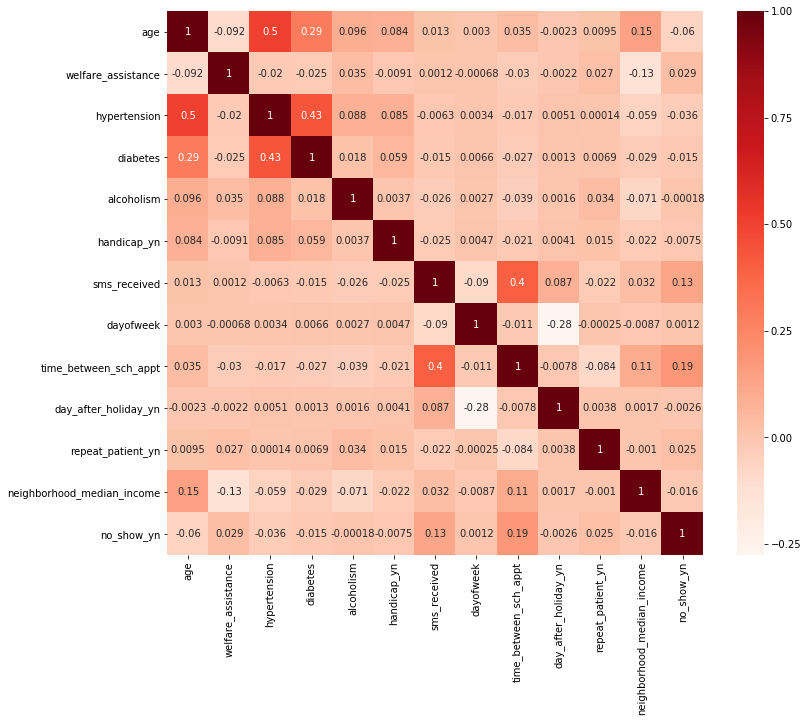

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=plt.cm.Reds)

plt.savefig('..\images\correlation_matrix.png')


In [6]:
#check out correlation data
corr

,age,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received,dayofweek,time_between_sch_appt,day_after_holiday_yn,repeat_patient_yn,neighborhood_median_income,no_show_yn
age,1.000000,-0.092469,0.504599,0.292398,0.095811,0.083827,0.012629,0.003043,0.034813,-0.002317,0.009520,0.147306,-0.060320
welfare_assistance,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.009068,0.001182,-0.000682,-0.030435,-0.002187,0.026790,-0.127161,0.029166
hypertension,0.504599,-0.019738,1.000000,0.433082,0.087967,0.084949,-0.006285,0.003442,-0.017236,0.005108,0.000142,-0.059062,-0.035662
diabetes,0.292398,-0.024899,0.433082,1.000000,0.018471,0.059204,-0.014561,0.006607,-0.027200,0.001348,0.006882,-0.029168,-0.015158
alcoholism,0.095811,0.035019,0.087967,0.018471,1.000000,0.003715,-0.026154,0.002696,-0.038527,0.001612,0.034060,-0.071348,-0.000181
handicap_yn,0.083827,-0.009068,0.084949,0.059204,0.003715,1.000000,-0.025148,0.004697,-0.020885,0.004067,0.015044,-0.021591,-0.007528
sms_received,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.025148,1.000000,-0.089880,0.398128,0.087368,-0.021882,0.031858,0.126502
dayofweek,0.003043,-0.000682,0.003442,0.006607,0.002696,0.004697,-0.089880,1.000000,-0.011341,-0.275074,-0.000250,-0.008674,0.001189
time_between_sch_appt,0.034813,-0.030435,-0.017236,-0.027200,-0.038527,-0.020885,0.398128,-0.011341,1.000000,-0.007752,-0.084456,0.106876,0.186320
day_after_holiday_yn,-0.002317,-0.002187,0.005108,0.001348,0.001612,0.004067,0.087368,-0.275074,-0.007752,1.000000,0.003755,0.001748,-0.002602


In [7]:
corr_matrix_df = pd.DataFrame(corr)

In [8]:
#Export to csv 
corr_matrix_df.to_csv('../data/cleanData/modelResults/corr_matrix_df.csv', index = False, header=True)

In [10]:
# check out the more highly correlated features
#Correlation with output variable
corr_target = abs(corr['no_show_yn'])

#Selecting highly correlated features
relevant_features = corr_target[corr_target>0.5]
relevant_features

no_show_yn    1.0
Name: no_show_yn, dtype: float64

### Remove Columns with Correlation Extremes

From looking through our Correlation Matrix data, it appears that the the most extreme correlation values are less than 0.8. Let's remove those columns.

In [9]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] <= -0.8:
            if columns[j]:
                columns[j] = False

### View Columns Selected

In [10]:
selected_columns = clean_data.columns[columns]
selected_columns.shape

(25,)

In [11]:
clean_data = clean_data[selected_columns]
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110521 entries, 0 to 110520
Data columns (total 25 columns):
repeat_patient_yn                110521 non-null float64
male_yn                          110521 non-null int64
same_day_appt_yn                 110521 non-null int64
within_week_appt_yn              110521 non-null int64
advanced_appt_yn                 110521 non-null int64
monday_yn                        110521 non-null int64
tuesday_yn                       110521 non-null int64
wednesday_yn                     110521 non-null int64
thursday_yn                      110521 non-null int64
friday_yn                        110521 non-null int64
saturday_yn                      110521 non-null int64
neighborhood_income_lower_yn     110521 non-null int64
neighborhood_income_middle_yn    110521 non-null int64
day_after_holiday_yn             110521 non-null int64
child_yn                         110521 non-null int64
young_adult_yn                   110521 non-null int64
adult_y

It appears that the female and higher income neighborhood data was removed. We now have 25 columns of data.

In [12]:
# Remove target column
selected_columns = selected_columns[:1].values
selected_columns

array(['repeat_patient_yn'], dtype=object)

### Select Columns based on p-value

In [13]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [18]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(clean_data.iloc[:,:1].values, clean_data.iloc[:,0].values, SL, selected_columns)

In [19]:
#move results to dataframe
result = pd.DataFrame()
result['noshow'] = clean_data.iloc[:,0]

In [20]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
data.head()

,repeat_patient_yn
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


### Plot selected columns to see distributions

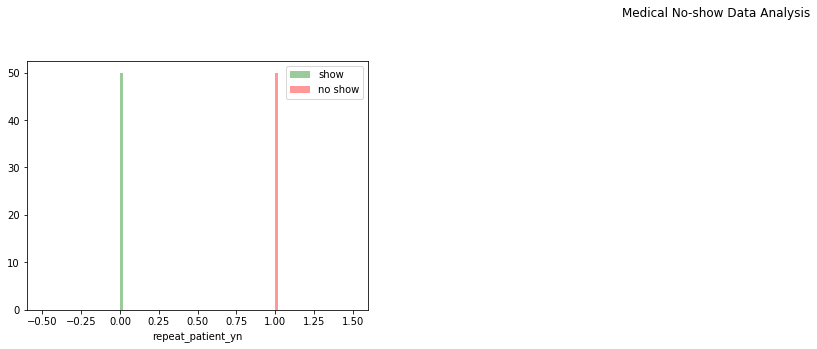

In [21]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['noshow']==0], color='g', label = 'show')
    sns.distplot(data[i][result['noshow']==1], color='r', label = 'no show')
    plt.legend(loc='best')
fig.suptitle('Medical No-show Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


### Build SVC Model 

In [22]:
x_train, x_test, y_train, y_test = train_test_split(clean_data.values, result.values, test_size = 0.2)

In [23]:
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
prediction = svc.predict(x_test)

In [25]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

1.0
